In [2]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix

import lime
import lime.lime_tabular

import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
df_original = pd.read_csv("xML Challenge Dataset and Data Dictionary/heloc_dataset_v1.csv")
#df = pd.read_csv("testing_new.csv")
df = pd.read_csv("working_data_full.csv")

feature_names = list(df_original)
data = df.values
data = np.delete(data, 0, 1) # Deleting dataframe extra column

#np.place(data, data == -7, 150)

y = data[:,:1]
X = data[:,1:]
print(X.shape)
num_samples , num_attributes = X.shape

# --- Scaling ---
#scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(X)

# --- Separating Data ---
X_tr = X_scaled[:int(0.8*num_samples)]
X_test = X_scaled[int(0.8*num_samples):]

y_tr = y[:int(0.8*num_samples)]
y_test = y[int(0.8*num_samples):]

print("Training samples: ", X_tr.shape[0])
print("Test samples: ", X_test.shape[0])

(9871, 23)
Training samples:  7896
Test samples:  1975


In [21]:
def acc_test_SVM(C_val):
    print("Running ", C_val)
    svc = svm.SVC(kernel='linear',C=C_val)
    svc.fit(X_tr,y_tr.reshape(y_tr.shape[0],))
    y_pred = svc.predict(X_test)
    acc = np.mean(y_pred.reshape(y_pred.shape[0],1) == y_test)
    return acc

Running  1e-05
Running  0.0001
Running  0.001
Running  0.01
Running  0.1
Running  1


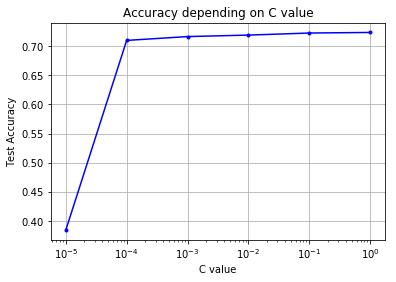

In [22]:
C_acc = []
C_options = [0.00001,0.0001,0.001,0.01,0.1,1]

for test in C_options:
    C_acc.append(acc_test_SVM(test))
    
plt.semilogx(C_options,C_acc,'.-',color='blue')
plt.title("Accuracy depending on C value")
plt.xlabel('C value')
plt.ylabel('Test Accuracy')
plt.grid()

In [4]:
svc = svm.SVC(kernel='linear',C=0.01)

svc.fit(X_tr,y_tr.reshape(y_tr.shape[0],))

train_pred = svc.predict(X_tr)
test_pred = svc.predict(X_test)

acc_train = np.mean(train_pred.reshape(train_pred.shape[0],1) == y_tr)
acc_test = np.mean(test_pred.reshape(test_pred.shape[0],1) == y_test)


print("Training Accuracy", acc_train*100, "%")
print("Test Accuracy", acc_test*100, "%")

Training Accuracy 72.6443768997 %
Test Accuracy 75.0379746835 %


In [128]:
print(classification_report(y_test, test_pred, target_names=["Bad","Good"]))
print(confusion_matrix(y_test, test_pred))

             precision    recall  f1-score   support

        Bad       0.73      0.78      0.75       966
       Good       0.77      0.72      0.74      1009

avg / total       0.75      0.75      0.75      1975

[[755 211]
 [285 724]]


In [5]:
svc2 = svm.SVC(kernel='linear',C=0.001,probability=True)

svc2.fit(X_tr,y_tr.reshape(y_tr.shape[0],))

y_prob = svc2.predict_proba(X_test)
print(y_prob.shape)

(1975, 2)


In [11]:
#y_prob = svc2.predict_proba(X_test[10])
print(X_test[10])
y_prob = svc2.predict_proba(X_test[10].reshape(1, -1))
print(y_prob)

[-0.81627885 -0.95187467 -0.27683122 -0.69803612 -0.45239355  1.95249842
  0.61946606 -1.47464579 -0.65120878  0.14717649 -0.74335467 -0.12581464
  1.16857164 -0.81429678 -0.52524019 -0.68162275 -0.66656747  0.61216955
  0.09024432  0.30632689  0.98180066 -0.04889541  1.11306964]
[[ 0.77542038  0.22457962]]


In [63]:
def brute_force_test(data,left,right):
    col_1 = data[:,9]
    np.place(col_1, col_1 == -7, left)
    
    col_2 = data[:,15]
    np.place(col_2, col_2 == -7, right)

    data[:,9] = col_1
    data[:,15] = col_2

    return data

In [69]:
left = [100,150,250]
right = [100,150,250]

for l in left:
    for r in right:
        df = pd.read_csv("K-means results/datano8_mean5.csv")
        data = df.values
        data = np.delete(data, 0, 1) # Deleting dataframe extra column
        
        data = brute_force_test(data,l,r)
        y = data[:,:1]
        X = data[:,1:]
        num_samples , num_attributes = X.shape

        # --- Scaling ---
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # --- Separating Data ---
        X_tr = X_scaled[:int(0.5*num_samples)]
        X_val = X_scaled[int(0.5*num_samples):int(0.75*num_samples)]
        X_test = X_scaled[int(0.75*num_samples):]

        y_tr = y[:int(0.5*num_samples)]
        y_val = y[int(0.5*num_samples):int(0.75*num_samples)]
        y_test = y[int(0.75*num_samples):]
        
        svc = svm.SVC(kernel='linear',C=1)

        svc.fit(X_tr,y_tr.reshape(y_tr.shape[0],))

        y_lin = svc.predict(X_test)
        acc_lin = np.mean(y_lin.reshape(y_lin.shape[0],1) == y_test)

        print("Accuracy:", acc_lin*100, "%", "Left:",l , "Right:",r)

Accuracy: 73.8249594814 % Left: 100 Right: 100
Accuracy: 73.8249594814 % Left: 100 Right: 150
Accuracy: 73.7844408428 % Left: 100 Right: 250
Accuracy: 74.1896272285 % Left: 150 Right: 100
Accuracy: 74.1896272285 % Left: 150 Right: 150
Accuracy: 74.14910859 % Left: 150 Right: 250
Accuracy: 73.9870340357 % Left: 250 Right: 100
Accuracy: 73.9870340357 % Left: 250 Right: 150
Accuracy: 74.0275526742 % Left: 250 Right: 250


In [12]:
from SVM_model import SVM_model

data = pd.read_csv("working_data_full.csv").values
data = np.delete(data, 0, 1) # Deletes First Column
data = np.delete(data, 0, 1)


testing = SVM_model(None,"working_data_full.csv")

testing.train_model(0.01)

testing.test_model()

one_sample = data[10]

print(testing.run_model(one_sample))

Training Accuracy: 72.64 %
Test Accuracy: 75.04 %
0.191015668272
Training Accuracy: 72.64 %
Test Accuracy: 75.04 %
0.189700093492
